In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:93% !important; }</style>"))

In [2]:
# visualizations
import matplotlib.pyplot as plt
import seaborn as sn

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# machine learning processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from scikitplot.metrics import plot_roc, plot_confusion_matrix

from xgboost import XGBClassifier

#basic imports
import pandas as pd
import numpy as np
import os

In [3]:
df = pd.read_csv("machineLearningData.csv")
df = df.sample(frac=.01, random_state=42)
df

,Itinerary_ID,Year,Quarter,Number_Coupons,Origin_Airport_ID,Origin_Airport_Seq_ID,Origin_City_Market_ID,Origin,Origin_State,Origin_WAC,...,Dest_City_Market_ID,Destination,Dest_State,Dest_WAC,Flight_Distance,Fare,Ticket_Carrier,Operating_Carrier,Reporting_Carrier,Number_Passengers
178977,20201132820,2020,1,2,10423,1042302,30423,AUS,TX,74,...,30194,DFW,TX,74,190,76,AA,AA,AA,1
143072,20201552490,2020,1,4,13244,1324402,33244,MEM,TN,54,...,30194,DFW,TX,74,431,726,AA,AA,AA,1
216423,20201193409,2020,1,3,11057,1105703,31057,CLT,NC,36,...,31423,DSM,IA,61,815,348,AA,OH,AA,1
218209,20201250110,2020,1,2,11252,1125203,31252,DAB,FL,33,...,31057,CLT,NC,36,416,216,AA,AA,AA,1
5942,20201308219,2020,1,2,13303,1330303,32467,MIA,FL,33,...,30194,DFW,TX,74,1121,705,AA,AA,AA,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260888,20201149064,2020,1,4,13930,1393007,30977,ORD,IL,41,...,33570,SAN,CA,91,1723,562,AA,AA,AA,1
25222,2020148667,2020,1,4,10397,1039707,30397,ATL,GA,34,...,30255,HSV,AL,51,151,729,DL,DL,9E,1
19850,20201401939,2020,1,4,11298,1129806,30194,DFW,TX,74,...,32600,LIT,AR,71,304,376,AA,MQ,AA,2
17930,20201312904,2020,1,3,13891,1389101,32575,ONT,CA,91,...,32575,LAX,CA,91,47,808,--,--,AA,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2625 entries, 178977 to 38738
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Itinerary_ID           2625 non-null   int64 
 1   Year                   2625 non-null   int64 
 2   Quarter                2625 non-null   int64 
 3   Number_Coupons         2625 non-null   int64 
 4   Origin_Airport_ID      2625 non-null   int64 
 5   Origin_Airport_Seq_ID  2625 non-null   int64 
 6   Origin_City_Market_ID  2625 non-null   int64 
 7   Origin                 2625 non-null   object
 8   Origin_State           2625 non-null   object
 9   Origin_WAC             2625 non-null   int64 
 10  Dest_Airport_ID        2625 non-null   int64 
 11  Dest_Airport_Seq_ID    2625 non-null   int64 
 12  Dest_City_Market_ID    2625 non-null   int64 
 13  Destination            2625 non-null   object
 14  Dest_State             2625 non-null   object
 15  Dest_WAC       

In [5]:
df.describe()

,Itinerary_ID,Year,Quarter,Number_Coupons,Origin_Airport_ID,Origin_Airport_Seq_ID,Origin_City_Market_ID,Origin_WAC,Dest_Airport_ID,Dest_Airport_Seq_ID,Dest_City_Market_ID,Dest_WAC,Flight_Distance,Fare,Number_Passengers
count,2.625000e+03,2625.0,2625.0,2625.000000,2625.000000,2.625000e+03,2625.000000,2625.000000,2625.000000,2.625000e+03,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000
mean,1.588946e+10,2020.0,1.0,3.066286,12119.423238,1.211946e+06,31439.819048,49.530667,12318.455619,1.231850e+06,31542.502095,50.346667,832.561143,464.615238,1.500190
std,7.793202e+09,0.0,0.0,1.174303,1353.379316,1.353376e+05,1194.940545,23.903211,1466.070221,1.466066e+05,1294.537064,24.020194,658.788394,359.230031,3.228131
min,2.020135e+07,2020.0,1.0,1.000000,10135.000000,1.013506e+06,30135.000000,2.000000,10135.000000,1.013506e+06,30135.000000,1.000000,11.000000,0.000000,1.000000
25%,2.020111e+10,2020.0,1.0,2.000000,11057.000000,1.105703e+06,30436.000000,33.000000,11057.000000,1.105703e+06,30466.000000,34.000000,361.000000,249.000000,1.000000
50%,2.020126e+10,2020.0,1.0,3.000000,11433.000000,1.143302e+06,31057.000000,41.000000,11638.000000,1.163807e+06,31057.000000,41.000000,632.000000,409.000000,1.000000
75%,2.020142e+10,2020.0,1.0,4.000000,13204.000000,1.320402e+06,32211.000000,74.000000,13495.000000,1.349505e+06,32457.000000,74.000000,1106.000000,595.000000,1.000000
max,2.020161e+10,2020.0,1.0,8.000000,16218.000000,1.621802e+06,35412.000000,93.000000,16218.000000,1.621802e+06,35412.000000,93.000000,4502.000000,5026.000000,81.000000


In [6]:
len(df)

2625

In [7]:
#df = pd.get_dummies(df, columns=["Origin", "Destination"])

In [8]:
corrs = df.corr()
corrs

,Itinerary_ID,Year,Quarter,Number_Coupons,Origin_Airport_ID,Origin_Airport_Seq_ID,Origin_City_Market_ID,Origin_WAC,Dest_Airport_ID,Dest_Airport_Seq_ID,Dest_City_Market_ID,Dest_WAC,Flight_Distance,Fare,Number_Passengers
Itinerary_ID,1.000000,NaN,NaN,-0.072104,0.034343,0.034343,-0.048618,0.179299,0.069650,0.069650,-0.020531,0.199376,0.199775,-0.005896,0.062794
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quarter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_Coupons,-0.072104,NaN,NaN,1.000000,-0.017070,-0.017069,-0.013658,0.003539,-0.101578,-0.101578,-0.052778,-0.039942,-0.092409,0.233838,-0.162664
Origin_Airport_ID,0.034343,NaN,NaN,-0.017070,1.000000,1.000000,0.672392,0.114074,-0.010295,-0.010294,-0.055409,0.016525,0.134343,-0.008612,0.017811
Origin_Airport_Seq_ID,0.034343,NaN,NaN,-0.017069,1.000000,1.000000,0.672392,0.114077,-0.010293,-0.010293,-0.055407,0.016526,0.134345,-0.008611,0.017811
Origin_City_Market_ID,-0.048618,NaN,NaN,-0.013658,0.672392,0.672392,1.000000,-0.141665,-0.072792,-0.072791,-0.136783,-0.072878,0.064475,-0.007483,-0.015242
Origin_WAC,0.179299,NaN,NaN,0.003539,0.114074,0.114077,-0.141665,1.000000,0.071786,0.071786,-0.031464,0.270098,0.110287,0.057425,0.022769
Dest_Airport_ID,0.069650,NaN,NaN,-0.101578,-0.010295,-0.010293,-0.072792,0.071786,1.000000,1.000000,0.653258,0.133666,0.160709,0.002859,0.007754
Dest_Airport_Seq_ID,0.069650,NaN,NaN,-0.101578,-0.010294,-0.010293,-0.072791,0.071786,1.000000,1.000000,0.653257,0.133668,0.160711,0.002860,0.007754


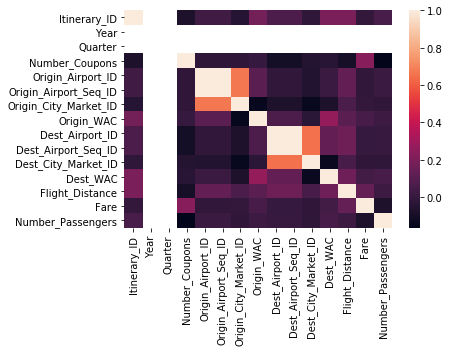

In [9]:
sn.heatmap(corrs)

In [10]:
abs(corrs["Fare"]).sort_values(ascending=False)

Fare                     1.000000
Number_Coupons           0.233838
Flight_Distance          0.138802
Number_Passengers        0.074069
Origin_WAC               0.057425
Dest_WAC                 0.042495
Dest_City_Market_ID      0.014331
Origin_Airport_ID        0.008612
Origin_Airport_Seq_ID    0.008611
Origin_City_Market_ID    0.007483
Itinerary_ID             0.005896
Dest_Airport_Seq_ID      0.002860
Dest_Airport_ID          0.002859
Year                          NaN
Quarter                       NaN
Name: Fare, dtype: float64

In [11]:
features = list(corrs["Fare"].loc[abs(corrs["Fare"]) > .1].index)
features = features[0:len(features)-1]
features

['Number_Coupons', 'Flight_Distance']

In [12]:
target_col = "Fare"

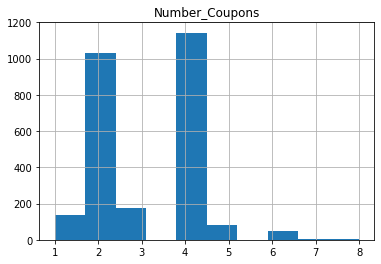

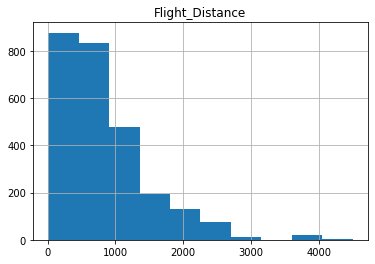

In [13]:
for col in features:
    df[[col]].hist()

In [14]:
#split the data
X = df[features]
y = df[target_col].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [15]:
print(X.shape, y.shape)

(2625, 2) (2625, 1)


In [16]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.8)

In [17]:
print(len(X_train))
print(len(X_test))

2100
525


In [18]:
#SCALE 
X_scaler = StandardScaler().fit(X_train)

#scale train/test
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [19]:
 # Create the model using LinearRegression

from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
lm.fit(X_train_scaled, y_train)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
predictions_train_lm = lm.predict(X_train_scaled)
predictions_test_lm = lm.predict(X_test_scaled)

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
mse_train_lm = mean_squared_error(y_train, predictions_train_lm)
r2_train_lm = r2_score(y_train, predictions_train_lm)

print(mse_train_lm)
print(r2_train_lm)

104146.4289249345
0.07711642166602517


In [25]:
mse_test_lm = mean_squared_error(y_test, predictions_test_lm)
r2_test_lm = r2_score(y_test, predictions_test_lm)

print(mse_test_lm)
print(r2_test_lm)

176825.87592687443
0.08603232924194937


In [26]:
import random

In [27]:
random.seed(42)

mse_train_lm_list = []
r2_train_lm_list = []

mse_test_lm_list = []
r2_test_lm_list = []

for i in range(10):
    random_state = random.randint(0, 5000)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state, train_size=0.8)
    
    X_scaler = StandardScaler().fit(X_train)

    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)

    lm = LinearRegression()
    lm.fit(X_train_scaled, y_train)

    predictions_train_lm = lm.predict(X_train_scaled)
    predictions_test_lm = lm.predict(X_test_scaled)
    
    mse_train_lm = mean_squared_error(y_train, predictions_train_lm)
    r2_train_lm = r2_score(y_train, predictions_train_lm)
    mse_test_lm = mean_squared_error(y_test, predictions_test_lm)
    r2_test_lm = r2_score(y_test, predictions_test_lm)

    mse_train_lm_list.append(mse_train_lm)
    r2_train_lm_list.append(r2_train_lm)
    mse_test_lm_list.append(mse_test_lm)
    r2_test_lm_list.append(r2_test_lm)

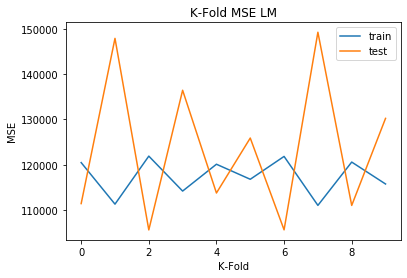

In [28]:
plt.plot(range(10), mse_train_lm_list, label="train")
plt.plot(range(10), mse_test_lm_list, label="test")
plt.title("K-Fold MSE LM")
plt.xlabel("K-Fold")
plt.ylabel("MSE")
plt.legend()
plt.show()

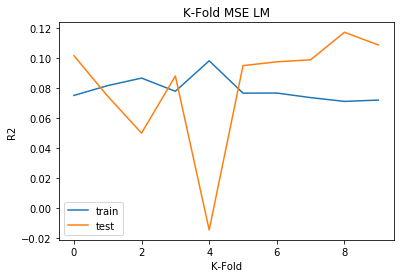

In [29]:
plt.plot(range(10), r2_train_lm_list, label="train")
plt.plot(range(10), r2_test_lm_list, label="test")
plt.title("K-Fold MSE LM")
plt.xlabel("K-Fold")
plt.ylabel("R2")
plt.legend()
plt.show()

In [30]:
print(np.mean(mse_train_lm_list))
print(np.mean(r2_train_lm))
print(np.mean(mse_test_lm))
print(np.mean(r2_test_lm))

117407.16405861129
0.07185556667898696
130224.20585213903
0.10854060924128661


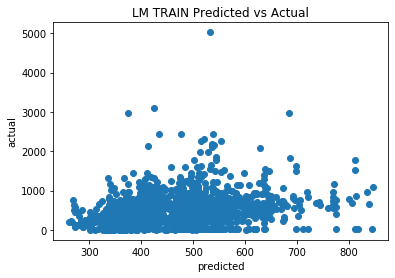

In [31]:
plt.scatter(predictions_train_lm, y_train)
plt.title("LM TRAIN Predicted vs Actual")
plt.xlabel("predicted")
plt.ylabel("actual")

plt.show()

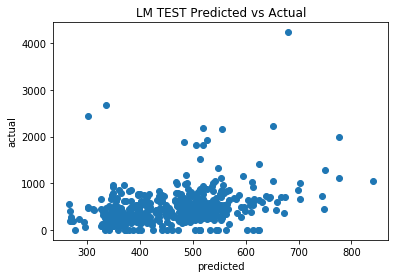

In [32]:
plt.scatter(predictions_test_lm, y_test)
plt.title("LM TEST Predicted vs Actual")
plt.xlabel("predicted")
plt.ylabel("actual")

plt.show()

In [33]:
resid_train_lm = predictions_train_lm - y_train
resid_test_lm = predictions_test_lm - y_test

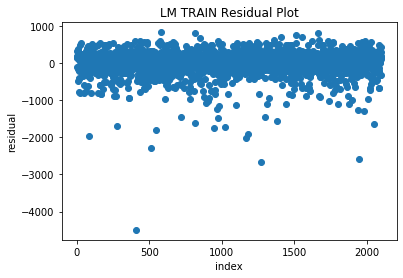

In [34]:
plt.scatter(range(len(resid_train_lm)), resid_train_lm)
plt.title("LM TRAIN Residual Plot")
plt.xlabel("index")
plt.ylabel("residual")

plt.show()

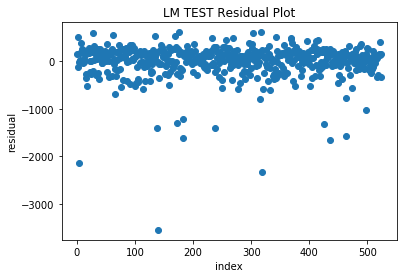

In [35]:
plt.scatter(range(len(resid_test_lm)), resid_test_lm)
plt.title("LM TEST Residual Plot")
plt.xlabel("index")
plt.ylabel("residual")

plt.show()

In [36]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [37]:
X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [38]:
rf.fit(X_train_scaled, y_train)
rf

C:\Users\Maxi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [39]:
predictions_train_rf = rf.predict(X_train_scaled)
predictions_test_rf = rf.predict(X_test_scaled)

In [40]:
mse_train_rf = mean_squared_error(y_train, predictions_train_rf)
r2_train_rf = r2_score(y_train, predictions_train_rf)

print(mse_train_rf)
print(r2_train_rf)

65073.283115851635
0.47826598412310917


In [41]:
mse_test_rf = mean_squared_error(y_test, predictions_test_rf)
r2_test_rf = r2_score(y_test, predictions_test_rf)

print(mse_test_rf)
print(r2_test_rf)

161636.15502687558
-0.10649220198314335


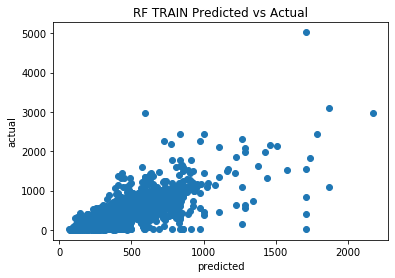

In [42]:
plt.scatter(predictions_train_rf, y_train)
plt.title("RF TRAIN Predicted vs Actual")
plt.xlabel("predicted")
plt.ylabel("actual")

plt.show()

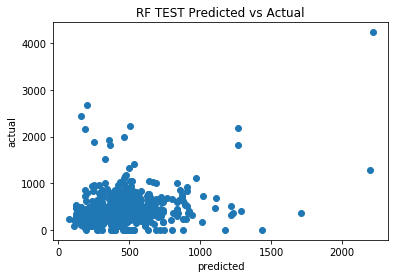

In [43]:
plt.scatter(predictions_test_rf, y_test)
plt.title("RF TEST Predicted vs Actual")
plt.xlabel("predicted")
plt.ylabel("actual")

plt.show()

In [44]:
resid_train_rf = predictions_train_rf - [x[0] for x in y_train]
resid_test_rf = predictions_test_rf - [x[0] for x in y_test]

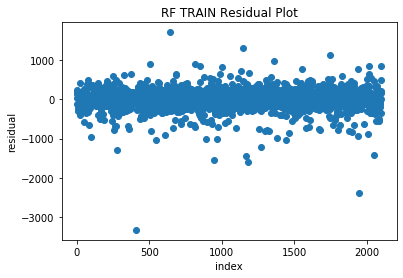

In [45]:
plt.scatter(range(len(resid_train_rf)), resid_train_rf)
plt.title("RF TRAIN Residual Plot")
plt.xlabel("index")
plt.ylabel("residual")

plt.show()

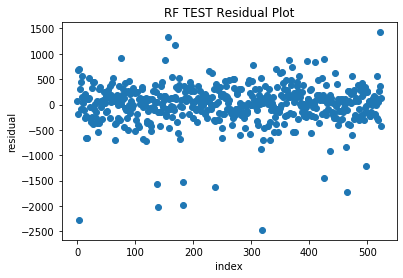

In [46]:
plt.scatter(range(len(resid_test_rf)), resid_test_rf)
plt.title("RF TEST Residual Plot")
plt.xlabel("index")
plt.ylabel("residual")

plt.show()

In [47]:
random.seed(42)

mse_train_rf_list = []
r2_train_rf_list = []

mse_test_rf_list = []
r2_test_rf_list = []

for i in range(10):
    random_state = random.randint(0, 5000)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state, train_size=0.8)
    
    X_scaler = StandardScaler().fit(X_train)

    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)

    rf = RandomForestRegressor()
    rf.fit(X_train_scaled, y_train)

    predictions_train_rf = rf.predict(X_train_scaled)
    predictions_test_rf = rf.predict(X_test_scaled)
    
    mse_train_rf = mean_squared_error(y_train, predictions_train_rf)
    r2_train_rf = r2_score(y_train, predictions_train_rf)
    mse_test_rf = mean_squared_error(y_test, predictions_test_rf)
    r2_test_rf = r2_score(y_test, predictions_test_rf)

    mse_train_rf_list.append(mse_train_rf)
    r2_train_rf_list.append(r2_train_rf)
    mse_test_rf_list.append(mse_test_rf)
    r2_test_rf_list.append(r2_test_rf)

C:\Users\Maxi\anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Maxi\anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Maxi\anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Maxi\anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Maxi\anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y

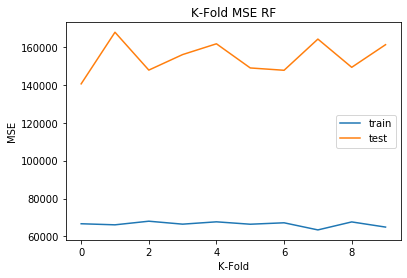

In [48]:
plt.plot(range(10), mse_train_rf_list, label="train")
plt.plot(range(10), mse_test_rf_list, label="test")
plt.title("K-Fold MSE RF")
plt.xlabel("K-Fold")
plt.ylabel("MSE")
plt.legend()
plt.show()

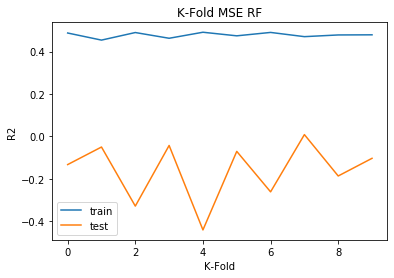

In [49]:
plt.plot(range(10), r2_train_rf_list, label="train")
plt.plot(range(10), r2_test_rf_list, label="test")
plt.title("K-Fold MSE RF")
plt.xlabel("K-Fold")
plt.ylabel("R2")
plt.legend()
plt.show()

In [50]:
print(np.mean(mse_train_rf_list))
print(np.mean(r2_train_rf))
print(np.mean(mse_test_rf))
print(np.mean(r2_test_rf))

66455.46155443166
0.4795253904611245
161221.9568325035
-0.10365677774237247


In [51]:
#SCALE on all the data
X_scaler_prod = StandardScaler().fit(X)
X_scaled_prod = X_scaler_prod.transform(X)

In [52]:
rf_prod = RandomForestRegressor()
rf_prod.fit(X_scaled_prod, y)

C:\Users\Maxi\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [53]:
predictions_prod_rf = rf_prod.predict(X_scaled_prod)
mse_prod_rf = mean_squared_error(y, predictions_prod_rf)
r2_prod_rf = r2_score(y, predictions_prod_rf)

print(mse_prod_rf)
print(r2_prod_rf)

69998.41670235594
0.45736422665496723


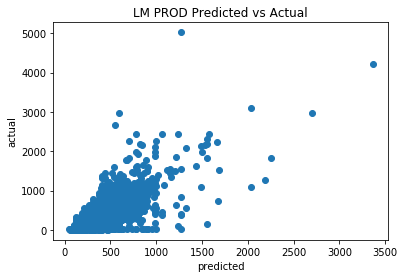

In [54]:
plt.scatter(predictions_prod_rf, y)
plt.title("LM PROD Predicted vs Actual")
plt.xlabel("predicted")
plt.ylabel("actual")

plt.show()

In [55]:
import pickle

In [63]:
#save the scaler
filename = 'finalized_scaler_meh.sav'
pickle.dump(X_scaler_prod, open(filename, 'wb'))

In [64]:
# save the model to disk
filename = 'ml_rf_fp_meh.sav'
pickle.dump(rf_prod, open(filename, 'wb'))

In [65]:
loaded_scaler = pickle.load(open('finalized_scaler_meh.sav', 'rb'))
loaded_model = pickle.load(open('ml_rf_fp_meh.sav', 'rb'))

In [66]:
X

,Number_Coupons,Flight_Distance
178977,2,190
143072,4,431
216423,3,815
218209,2,416
5942,2,1121
...,...,...
260888,4,1723
25222,4,151
19850,4,304
17930,3,47


In [84]:
tickets = 1
miles = 500

In [85]:
new_obs = [tickets, miles]

In [86]:
newData_scaled = loaded_scaler.transform([new_obs])
loaded_model.predict(newData_scaled)

array([223.59516667])